# OCR Integration for Scanned Documents

Optical Character Recognition (OCR) allows you to extract text from scanned documents where the text isn't embedded in the PDF. This tutorial demonstrates how to work with scanned documents.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load a PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf")
page = pdf.pages[0]

# Try extracting text without OCR
text_without_ocr = page.extract_text()
f"Without OCR: {len(text_without_ocr)} characters extracted"

CropBox missing from /Page, defaulting to MediaBox


'Without OCR: 0 characters extracted'

## Applying OCR and Finding Elements

The core method is `page.apply_ocr()`. This runs the OCR process and adds `TextElement` objects to the page. You can specify the engine and languages.

**Note:** Re-applying OCR to the same page or region will automatically remove any previously generated OCR elements for that area before adding the new ones.

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Using CPU. Note: This module is much faster with a GPU.


/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Found 44 text elements using default OCR


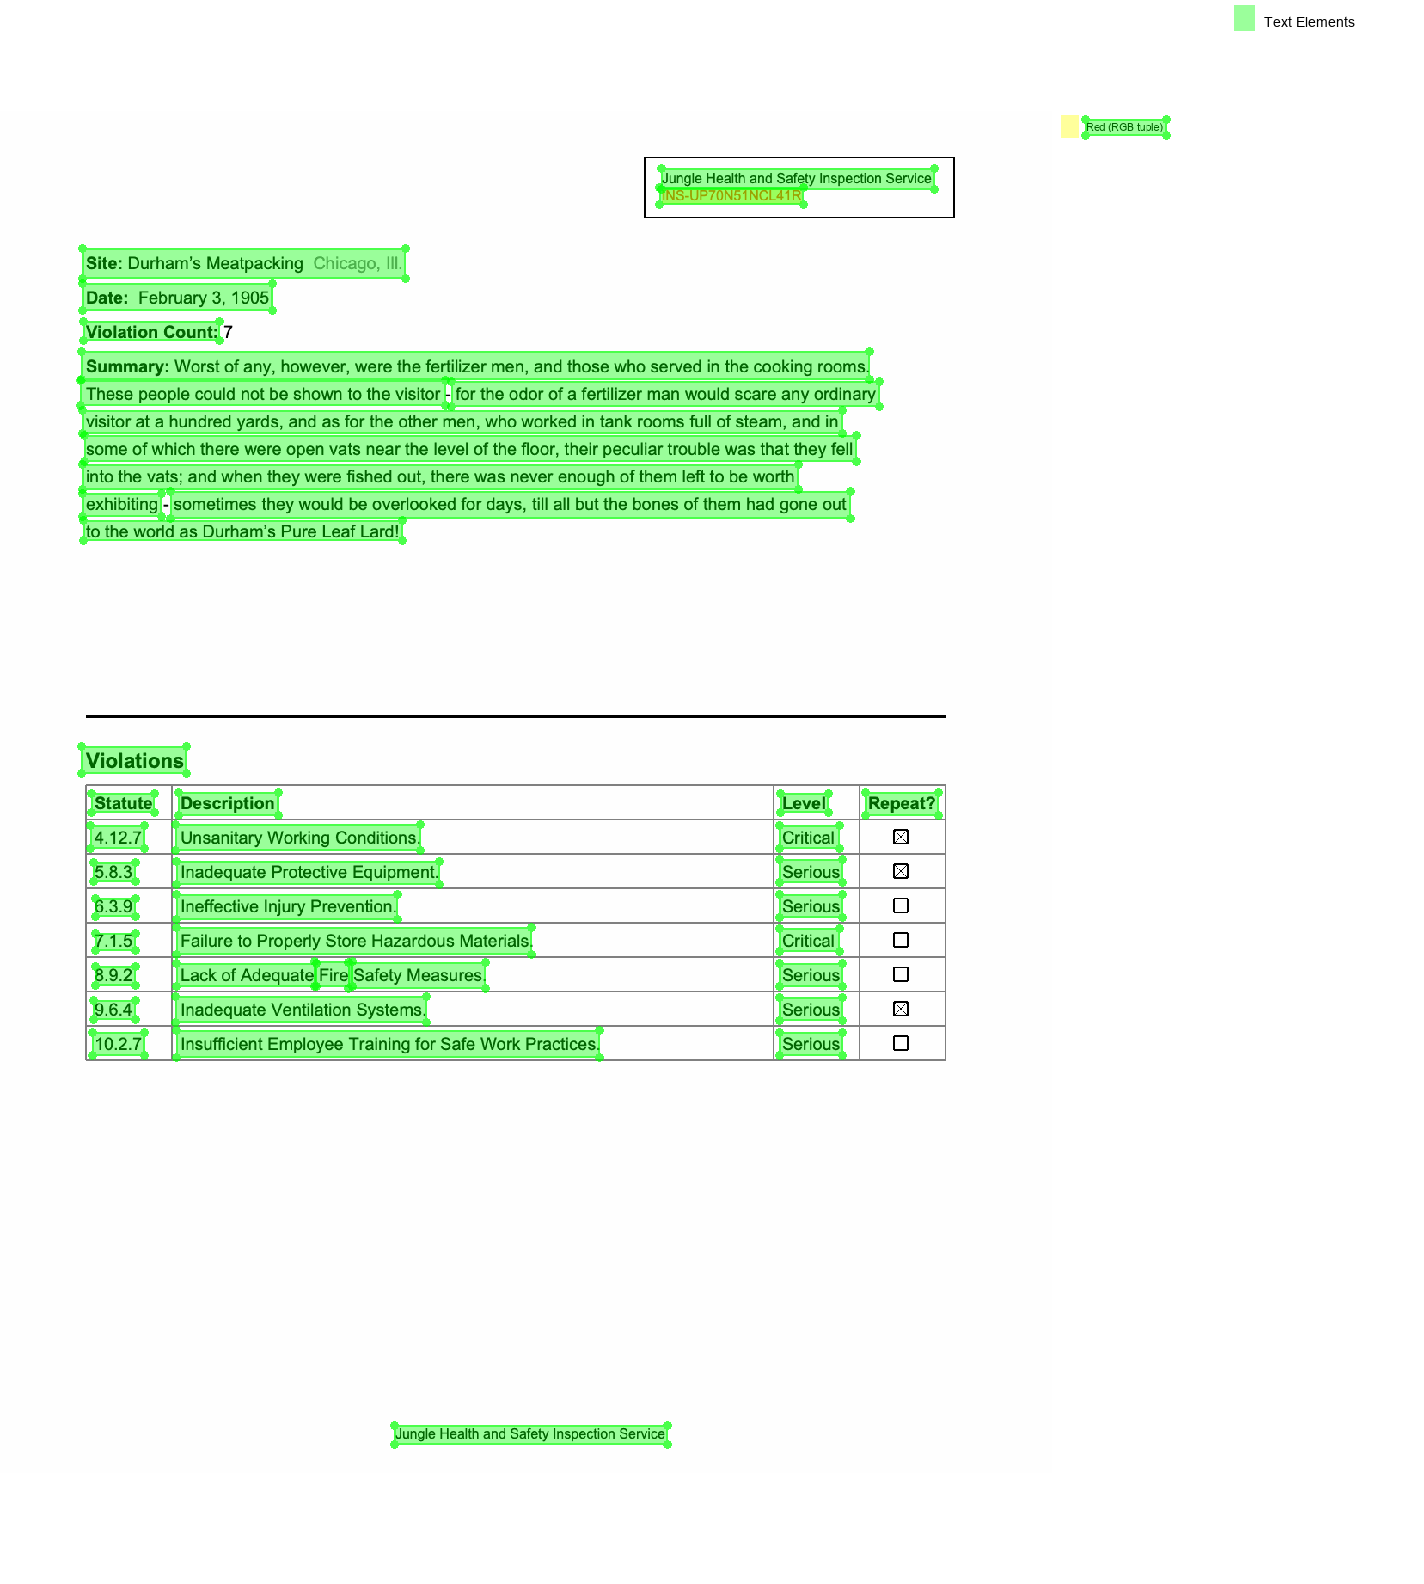

In [3]:
# Apply OCR using the default engine (EasyOCR) for English
page.apply_ocr(languages=['en'])

# Select all text pieces found by OCR
text_elements = page.find_all('text[source=ocr]')
print(f"Found {len(text_elements)} text elements using default OCR")

# Visualize the elements
text_elements.show()

In [4]:
# Apply OCR using PaddleOCR for English
page.apply_ocr(engine='paddle', languages=['en'])
print(f"Found {len(page.find_all('text[source=ocr]'))} elements after English OCR.")

# Apply OCR using PaddleOCR for Chinese
page.apply_ocr(engine='paddle', languages=['ch'])
print(f"Found {len(page.find_all('text[source=ocr]'))} elements after Chinese OCR.")

text_with_ocr = page.extract_text()
print(f"\nExtracted text after OCR:\n{text_with_ocr[:150]}...")

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Found 43 elements after English OCR.


Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Found 43 elements after Chinese OCR.

Extracted text after OCR:
Red (RGB tuple)
Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham's Meatpacking Chicago, .
Date:February 3.1905
Violation Cou...


## Setting Default OCR Options

You can set global default OCR options using `natural_pdf.options`. These defaults will be used automatically when you call `apply_ocr()` without specifying parameters.

In [5]:
import natural_pdf as npdf

# Set global OCR defaults
npdf.options.ocr.engine = 'surya'          # Default OCR engine
npdf.options.ocr.languages = ['en', 'es']  # Default languages
npdf.options.ocr.min_confidence = 0.7      # Default confidence threshold

# Now all OCR calls use these defaults
pdf = npdf.PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf")
pdf.pages[0].apply_ocr()  # Uses: engine='surya', languages=['en', 'es'], min_confidence=0.7

# You can still override defaults for specific calls
pdf.pages[0].apply_ocr(engine='easyocr', languages=['fr'])  # Override engine and languages

[2025-06-15 00:28:33,706] [ WARNING] pdfpage.py:202 - CropBox missing from /Page, defaulting to MediaBox


Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Detecting bboxes:   0%|                                                                                         | 0/1 [00:00<?, ?it/s]

Detecting bboxes: 100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]

Detecting bboxes: 100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]

Recognizing Text:   0%|                                                                                        | 0/47 [00:00<?, ?it/s]

Recognizing Text:   2%|█▋                                                                              | 1/47 [00:05<04:29,  5.85s/it]

Recognizing Text:  17%|█████████████▌                                                                  | 8/47 [00:06<00:23,  1.68it/s]

Recognizing Text:  28%|█████████████████████▊                                                         | 13/47 [00:06<00:10,  3.12it/s]

Recognizing Text:  34%|██████████████████████████▉                                                    | 16/47 [00:06<00:07,  4.18it/s]

Recognizing Text:  43%|█████████████████████████████████▌                                             | 20/47 [00:06<00:04,  6.06it/s]

Recognizing Text:  49%|██████████████████████████████████████▋                                        | 23/47 [00:06<00:03,  7.66it/s]

Recognizing Text:  55%|███████████████████████████████████████████▋                                   | 26/47 [00:07<00:03,  6.35it/s]

Recognizing Text:  60%|███████████████████████████████████████████████                                | 28/47 [00:08<00:03,  5.39it/s]

Recognizing Text:  64%|██████████████████████████████████████████████████▍                            | 30/47 [00:08<00:03,  4.53it/s]

Recognizing Text:  68%|█████████████████████████████████████████████████████▊                         | 32/47 [00:09<00:04,  3.31it/s]

Recognizing Text:  70%|███████████████████████████████████████████████████████▍                       | 33/47 [00:10<00:03,  3.59it/s]

Recognizing Text:  72%|█████████████████████████████████████████████████████████▏                     | 34/47 [00:10<00:03,  3.88it/s]

Recognizing Text:  74%|██████████████████████████████████████████████████████████▊                    | 35/47 [00:10<00:04,  2.68it/s]

Recognizing Text:  77%|████████████████████████████████████████████████████████████▌                  | 36/47 [00:11<00:03,  2.87it/s]

Recognizing Text:  81%|███████████████████████████████████████████████████████████████▊               | 38/47 [00:11<00:02,  3.49it/s]

Recognizing Text:  85%|███████████████████████████████████████████████████████████████████▏           | 40/47 [00:12<00:01,  3.79it/s]

Recognizing Text:  87%|████████████████████████████████████████████████████████████████████▉          | 41/47 [00:13<00:02,  2.15it/s]

Recognizing Text:  89%|██████████████████████████████████████████████████████████████████████▌        | 42/47 [00:19<00:09,  1.83s/it]

Recognizing Text:  91%|████████████████████████████████████████████████████████████████████████▎      | 43/47 [00:20<00:06,  1.64s/it]

Recognizing Text:  94%|█████████████████████████████████████████████████████████████████████████▉     | 44/47 [00:21<00:03,  1.26s/it]

Recognizing Text:  96%|███████████████████████████████████████████████████████████████████████████▋   | 45/47 [00:21<00:01,  1.03it/s]

Recognizing Text:  98%|█████████████████████████████████████████████████████████████████████████████▎ | 46/47 [00:22<00:00,  1.09it/s]

Recognizing Text: 100%|███████████████████████████████████████████████████████████████████████████████| 47/47 [00:22<00:00,  1.41it/s]

Recognizing Text: 100%|███████████████████████████████████████████████████████████████████████████████| 47/47 [00:22<00:00,  2.11it/s]

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-06-15 00:28:58,463] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


<Page number=1 index=0>

This is especially useful when processing many documents with the same OCR settings, as you don't need to specify the parameters repeatedly.

## Advanced OCR Configuration

For more control, import and use the specific `Options` class for your chosen engine within the `apply_ocr` call.

In [6]:
from natural_pdf.ocr import PaddleOCROptions, EasyOCROptions, SuryaOCROptions

# Re-apply OCR using EasyOCR with specific options
easy_opts = EasyOCROptions(
    paragraph=False,
)
page.apply_ocr(engine='easyocr', languages=['en'], min_confidence=0.1, options=easy_opts)

paddle_opts = PaddleOCROptions()
page.apply_ocr(engine='paddle', languages=['en'], options=paddle_opts)

surya_opts = SuryaOCROptions()
page.apply_ocr(engine='surya', languages=['en'], min_confidence=0.5, detect_only=True, options=surya_opts)

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Detecting bboxes:   0%|                                                                                         | 0/1 [00:00<?, ?it/s]

Detecting bboxes: 100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]

Detecting bboxes: 100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]

<Page number=1 index=0>

## Interactive OCR Correction / Debugging

If OCR results aren't perfect, you can use the bundled interactive web application (SPA) to review and correct them.

1.  **Package the data:**
    After running `apply_ocr` (or `apply_layout`), use `create_correction_task_package` to create a zip file containing the PDF images and detected elements.

    ```python
    from natural_pdf.utils.packaging import create_correction_task_package

    page.apply_ocr()

    create_correction_task_package(pdf, "correction_package.zip", overwrite=True)
    ```

2.  **Run the SPA:**
    Navigate to the SPA directory within the installed `natural_pdf` library in your terminal and start a simple web server.

3.  **Use the SPA:**
    Open `http://localhost:8000` in your browser. Drag the `correction_package.zip` file onto the page to load the document. You can then click on text elements to correct the OCR results.

## Working with Multiple Pages

Apply OCR or layout analysis to all pages using the `PDF` object.

In [7]:
# Process all pages in the document

# Apply OCR to all pages (example using EasyOCR)
pdf.apply_ocr(engine='easyocr', languages=['en'])
print(f"Applied OCR to {len(pdf.pages)} pages.")

# Or apply layout analysis to all pages (example using Paddle)
# pdf.apply_layout(engine='paddle')
# print(f"Applied Layout Analysis to {len(pdf.pages)} pages.")

# Extract text from all pages (uses OCR results if available)
all_text_content = pdf.extract_text(page_separator="\\n\\n---\\n\\n")

print(f"\nCombined text from all pages:\n{all_text_content[:500]}...")

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-06-15 00:29:33,180] [ WARNING] text_extraction.py:64 - Ignoring unsupported layout keyword argument: 'page_separator'


Applied OCR to 1 pages.

Combined text from all pages:
Red (RGB tuple )
Jungle Health and Safety Inspection Service
Date: February 3, 1905
Violation Count:
Summary: Worst of any, however; were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor
some of which there were open vats near the level of the floor; their peculiar trouble was that they fell
exhibitingsometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham's Pure Leaf Lardl
Violat...


## Saving PDFs with Searchable Text

After applying OCR to a PDF, you can save a new version of the PDF where the recognized text is embedded as an invisible layer. This makes the text searchable and copyable in standard PDF viewers.

Use the `save_searchable()` method on the `PDF`